<img src="https://upload.wikimedia.org/wikipedia/de/thumb/5/5b/Hochschule-aalen.svg/2000px-Hochschule-aalen.svg.png" alt="last access: 29.09.2021" width="400" height="30" style="float:right"/>

<img src="https://upload.wikimedia.org/wikipedia/de/thumb/4/41/Groupe_SEB_logo.svg/1200px-Groupe_SEB_logo.svg.png" alt="last access: 11.09.2022" width="30" height="30" style="float:left"/>

<hr style="height:2px;border:none;color:#003A6C;background-color:#003A6C;" />


Master Thesis Jessica Weiler, M.Sc. Data Science and Business Analytics 

# Image aesthetics assessment (IAA) of food and beverages using deep learning

## Preparation

### Load libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import PIL
import PIL.Image
from PIL import ImageFile, ImageOps, Image
from glob import glob
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import imutils 
import math
import random


# Image processing / Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Set Paths

In [2]:
#Set paths

#Set workdir
wpth =os.path.abspath(os.getcwd()).replace("\\","/")

#Save data save path
save_data_dir = os.path.join(wpth, 'Saved_Data').replace("\\","/")
datagen_dir=  os.path.join(save_data_dir, 'Datagen').replace("\\","/")

#Set folderpath RIAA 
RIAA_pth = os.path.join(wpth, 'Dataset','RIAA').replace("\\","/")



In [ ]:
#Resize, warp, size=224
dim=(224,224)
label= ['0_Unaesthetic', '1_Aesthetic','2_NotSure']

for i in range(len(label)):
    element=i
    labels=label[element]
    path= os.path.join(RIAA_pth, 'Data' , labels, '*').replace("\\","/")
    all_images = glob(path, recursive = True)
    print('Iteration label:',labels)
    for i in range(len(all_images)):
            from_image_dir= all_images[i].replace("\\","/")
            img = cv2.imread(from_image_dir)
            resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            imageurl =os.path.split(from_image_dir)[1]
            into_image_dir= os.path.join(RIAA_pth, 'Resized_224' , labels, str(imageurl))
            cv2.imwrite(into_image_dir, resized_img)

In [ ]:
#Resize, warp, size=300
dim=(300,300)
label= ['0_Unaesthetic', '1_Aesthetic','2_NotSure']

for i in range(len(label)):
    element=i
    labels=label[element]
    path= os.path.join(RIAA_pth, 'Data' , labels, '*').replace("\\","/")
    all_images = glob(path, recursive = True)
    print('Iteration label:',labels)
    for i in range(len(all_images)):
            from_image_dir= all_images[i].replace("\\","/")
            img = cv2.imread(from_image_dir)
            resized_img = cv2.resize(img, dim)
            imageurl =os.path.split(from_image_dir)[1]
            into_image_dir= os.path.join(RIAA_pth, 'Resized_300' , labels, str(imageurl))
            cv2.imwrite(into_image_dir, resized_img)

In [ ]:
#Resize, crop, size=224
size=224
label= ['0_Unaesthetic', '1_Aesthetic']

for i in range(len(label)):
    element=i
    labels=label[element]
    path= os.path.join(RIAA_pth, 'Data' , labels, '*').replace("\\","/")
    all_images = glob(path, recursive = True)
    print('Iteration label:',labels)
    for i in range(len(all_images)):
            from_image_dir= all_images[i].replace("\\","/")
            img = cv2.imread(from_image_dir)
            resized_cropped_img = image_resize_crop(img, size)
            imageurl =os.path.split(from_image_dir)[1]
            into_image_dir= os.path.join(RIAA_pth, 'Resized_Cropped_224' , labels, str(imageurl))
            cv2.imwrite(into_image_dir, resized_cropped_img)

In [ ]:
#Resize, padded, size=224
size=224
label= ['0_Unaesthetic', '1_Aesthetic']

for i in range(len(label)):
    element=i
    labels=label[element]
    path= os.path.join(RIAA_pth, 'Data' , labels, '*').replace("\\","/")
    all_images = glob(path, recursive = True)
    print('Iteration label:',labels)
    for i in range(len(all_images)):
            from_image_dir= all_images[i].replace("\\","/")
            img = Image.open(from_image_dir).convert('RGB')
            resized_padded_img=PIL.ImageOps.pad(img, size=(size,size), color=None, centering=(0.5, 0.5))
            imageurl =os.path.split(from_image_dir)[1]
            into_image_dir= os.path.join(RIAA_pth, 'Resized_Padded_224' , labels, str(imageurl))
            resized_padded_img.save(into_image_dir)
            #cv2.imwrite(into_image_dir, resized_padded_img)

### Plot some images

#### Original

Text(0.5, 1.0, 'Original image')

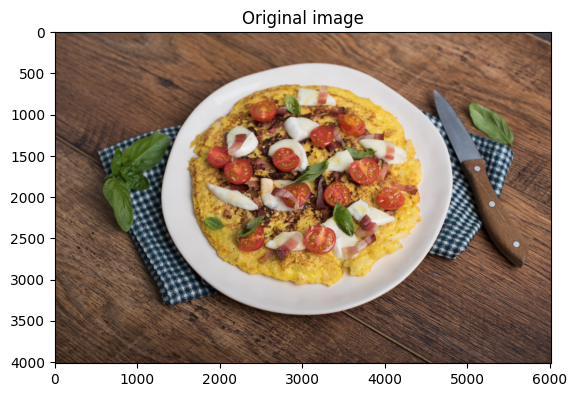

In [3]:
img= plt.imread(os.path.join(RIAA_pth, 'Data','1_Aesthetic', '000f3640-8692-4a37-aaa7-124dc07748ea.jpg').replace("\\","/"))
plt.imshow(img)
plt.title('Original image')

#### Resized, Warped

Text(0.5, 1.0, 'Resized and warped')

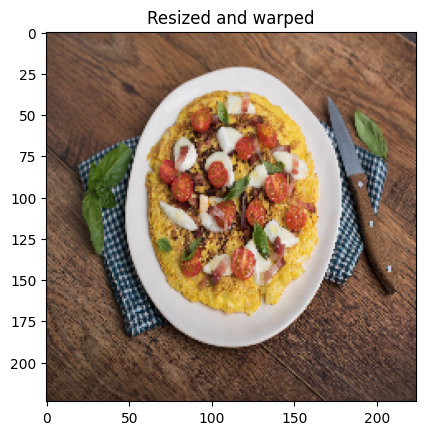

In [26]:
dim=(224,224)
new_img=cv2.resize(img, dim)
plt.imshow(new_img)
plt.title('Resized and warped')

#### Resized, Random Cropped

In [87]:
(h, w) = img.shape[:2]
print(h,w)

4016 6016


1629


Text(0.5, 1.0, 'Random cropped')

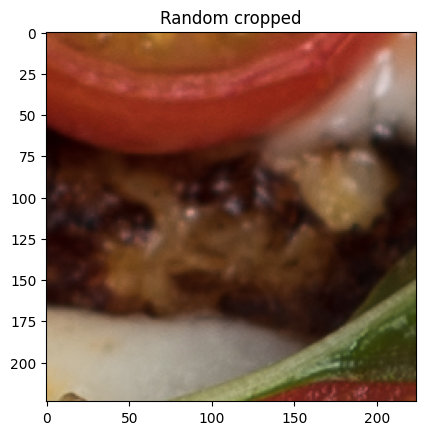

In [111]:
size=224
random_width=random.randrange(0, w-size)
print(random_width)

random_height=random.randrange(0, h-size)
(random_height)

random_crop_img = img[random_width:(random_width+size), random_height:(random_height+224)]
plt.imshow(random_crop_img)
plt.title('Random cropped')

2376


Text(0.5, 1.0, 'Random cropped')

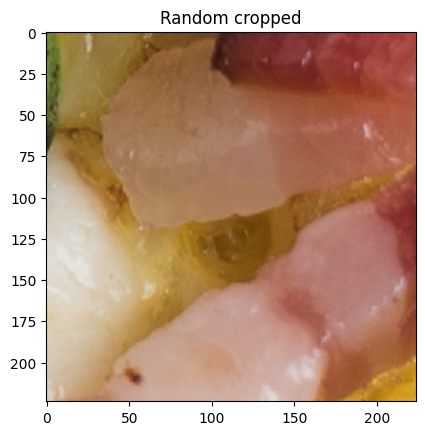

In [38]:
size=224
random_width=random.randrange(0, w-size)
print(random_width)

random_height=random.randrange(0, h-size)
(random_height)

random_crop_img = img[random_width:(random_width+size), random_height:(random_height+224)]
plt.imshow(random_crop_img)
plt.title('Random cropped')

1433


Text(0.5, 1.0, 'Random cropped')

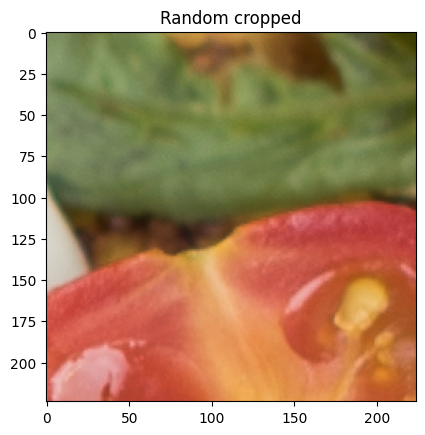

In [49]:
size=224
random_width=random.randrange(0, w-size)
print(random_width)

random_height=random.randrange(0, h-size)
(random_height)

random_crop_img = img[random_width:(random_width+size), random_height:(random_height+224)]
plt.imshow(random_crop_img)
plt.title('Random cropped')

#### Resized, Center Cropped

In [50]:
def image_resize_crop(image, size):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # check to see if the heigh is greater than width
    if w < h:
        # resize th image in regard to the shortest side
        # crop the image centered
        img_imutils = imutils.resize(image, width=size)
        (h, w) = img_imutils.shape[:2]
        crop_size=(h-size)/2
        cropped_image = img_imutils[math.ceil(crop_size):math.floor(h-crop_size),0:size]
    # otherwise, the width is greater
    else:
        # resize th image in regard to the shortest side
        # crop the image centered
        img_imutils = imutils.resize(image, height=size)
        (h, w) = img_imutils.shape[:2]
        crop_size=(w-size)/2
        cropped_image = img_imutils[0:size, math.ceil(crop_size):math.floor(w-crop_size)]

    # return the resized_cropped image
    return cropped_image

Text(0.5, 1.0, 'Resized and center-cropped')

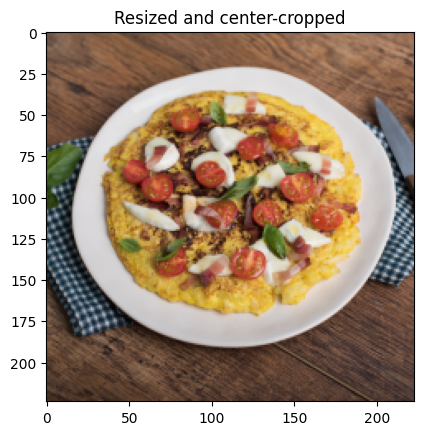

In [51]:
center_cropped_img=image_resize_crop(img, 224)
plt.imshow(center_cropped_img)
plt.title('Resized and center-cropped')

#### Resized, Padded

In [4]:
img = Image.open(os.path.join(RIAA_pth, 'Data','1_Aesthetic', '000f3640-8692-4a37-aaa7-124dc07748ea.jpg').replace("\\","/"))

In [53]:
img=PIL.ImageOps.pad(img, size=(224,224), color=None, centering=(0.5, 0.5)) #method=Resampling.BICUBIC, 

Text(0.5, 1.0, 'Resized and padded')

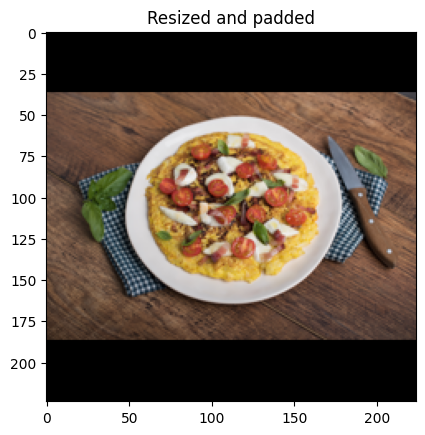

In [54]:
plt.imshow(img)
plt.title('Resized and padded')

#### Random data argumentation

In [115]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True,rotation_range=30, fill_mode='nearest', width_shift_range=0.2, height_shift_range=0.2, vertical_flip=True, brightness_range=[0.2,1.5],zoom_range=[0, 1.5] )

In [130]:
i = 0
for batch in datagen.flow_from_directory(datagen_dir, class_mode='binary',target_size=(224, 224),batch_size=1, shuffle=False, save_to_dir=datagen_dir,save_format='png',save_prefix=''):

    i += 1
    if i > 0: # save 1 images
        break 

Found 2 images belonging to 1 classes.


Text(0.5, 1.0, 'Random data augmentation')

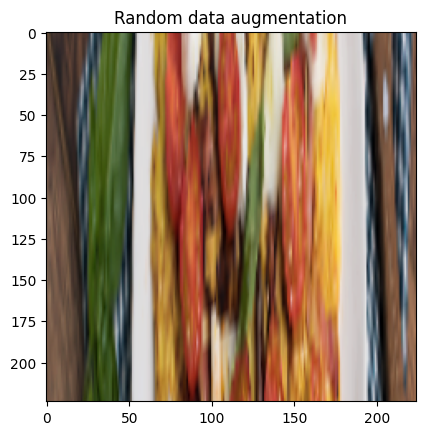

In [126]:
img = Image.open(os.path.join(datagen_dir,  '_0_8375876.png').replace("\\","/"))
plt.imshow(img)
plt.title('Random data augmentation')

Text(0.5, 1.0, 'Random data augmentation')

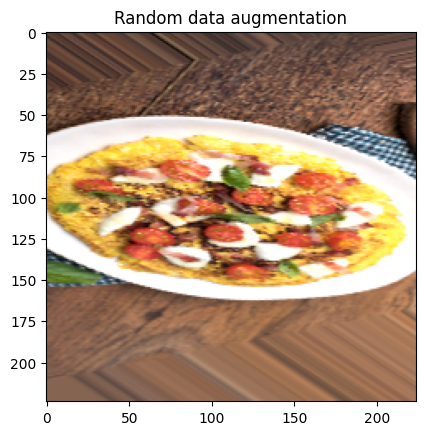

In [127]:
img = Image.open(os.path.join(datagen_dir,  '_0_6996736.png').replace("\\","/"))
plt.imshow(img)
plt.title('Random data augmentation')

Text(0.5, 1.0, 'Random data augmentation')

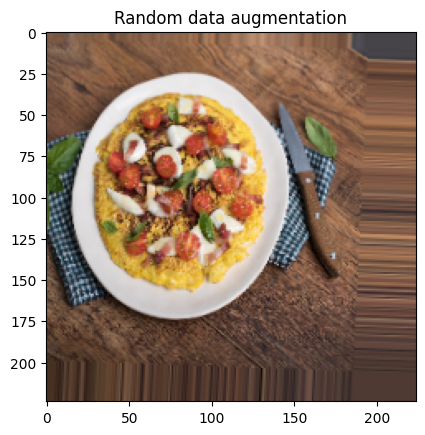

In [83]:
img = Image.open(os.path.join(datagen_dir,  '_0_1703246.png').replace("\\","/"))
plt.imshow(img)
plt.title('Random data augmentation')